In [0]:
!pip install tensorflow-gpu==2.0-beta1

     |████████████████████████████████| 348.9MB 19kB/s 
     |████████████████████████████████| 501kB 49.5MB/s 
     |████████████████████████████████| 3.1MB 48.7MB/s 
  Found existing installation: tensorflow-gpu 2.0.0
    Uninstalling tensorflow-gpu-2.0.0:
      Successfully uninstalled tensorflow-gpu-2.0.0


In [0]:
import tensorflow as tf
import numpy as np

In [48]:
tf.__version__

'2.0.0-beta1'

In [0]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  return x

In [0]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)
  
  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)
  
  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)
  
  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)
  
  conv5 = Conv2D_Block(pool4 , n_filters * 16)
  
  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)
  
  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)
  
  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)
  
  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)
  
  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)
  
  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])
  
  return u_net

In [0]:
data_file1 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/10066.zip' , extract=True )
mask1 = tf.keras.utils.get_file(fname='mask1.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/10066.png')
data_file2 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/10870.zip' , extract=True )
mask2 = tf.keras.utils.get_file(fname='mask2.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/10870.png')
data_file3 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/10917.zip' , extract=True )
mask3 = tf.keras.utils.get_file(fname='mask3.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/10917.png')
data_file4 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/1093.zip' , extract=True )
mask4 = tf.keras.utils.get_file(fname='mask4.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/1093.png')
data_file5 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/11160.zip' , extract=True )
mask5 = tf.keras.utils.get_file(fname='mask5.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/11160.png')
data_file6 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/11331.zip' , extract=True )
mask6 = tf.keras.utils.get_file(fname='mask6.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/11331.png')
data_file7 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/162.zip' , extract=True )
mask7 = tf.keras.utils.get_file(fname='mask7.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/162.png')
data_file8 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/17218.zip' , extract=True )
mask8 = tf.keras.utils.get_file(fname='mask8.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/17218.png')
data_file9 = tf.keras.utils.get_file(fname='d1' , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/images/17244.zip' , extract=True )
mask9 = tf.keras.utils.get_file(fname='mask9.png'  , origin='https://mypages.valdosta.edu/rpmihail/skyfinder/Masks/17244.png')


In [0]:
%ls /root/.keras/datasets/home/mihail/mypages/rpmihail/skyfinder/images


17218/  19388/  3395/  4181/  4795/  623/   7211/  8438/  8953/  9708/
17244/  204/    3396/  4232/  4801/  65/    7233/  858/   9112/  9730/
19106/  260/    3837/  4584/  5020/  6798/  7371/  861/   9291/
19306/  3297/   3888/  4679/  5021/  684/   75/    8733/  9483/


In [0]:
%ls /root/.keras/datasets/

10066/  10870/  10917/  1093/  11160/  11331/  162/  18590/  19834/  home/


In [0]:
%rm -r /root/.keras/datasets/*.zip

In [0]:
data_paths = []

In [0]:
br.close()

In [0]:
%pip install mechanize

In [0]:
import mechanize
br = mechanize.Browser()
br.open('https://mypages.valdosta.edu/rpmihail/skyfinder/images/')

<response_seek_wrapper at 0x7f8c4281b4e0 whose wrapped object = <closeable_response at 0x7f8c4281b470 whose fp = <_io.BufferedReader>>>

In [0]:
for link in br.links():
  if link.absolute_url[-4:] == '.zip':
    data_paths.append(tf.keras.utils.get_file(fname=link.url[2:] , origin=link.absolute_url, extract=True ))
    # print(link.url[2:])

51200000/51196925 [==============================] - 2s 0us/step


In [0]:
data_paths

[]

In [0]:
masks = []

In [0]:
for link in br.links():
  if link.absolute_url[-4:] == '.png':
    masks.append(tf.keras.utils.get_file(fname=link.url[8:] , origin=link.absolute_url))

In [0]:
br.close()

In [0]:
masks

In [0]:
import os

In [0]:
images_path = '/root/.keras/datasets/home/mihail/mypages/rpmihail/skyfinder/images'

In [0]:
data_files = os.listdir(images_path)

In [54]:
data_files

['4795',
 '3888',
 '9730',
 '9483',
 '3395',
 '5020',
 '75',
 '17244',
 '7371',
 '7211',
 '623',
 '9708',
 '8438',
 '3837',
 '17218',
 '6798',
 '4232',
 '3297',
 '260',
 '8953',
 '861',
 '4584',
 '65',
 '4801',
 '4181',
 '7233',
 '19306',
 '9291',
 '858',
 '9112',
 '204',
 '5021',
 '3396',
 '19388',
 '4679',
 '19106',
 '8733',
 '684']

In [0]:
images = []

In [56]:
for file in data_files:
  print(file)
  for image in os.listdir(os.path.join(images_path , file)):
    images.append(os.path.join(os.path.join(images_path , file) , image))

4795
3888
9730
9483
3395
5020
75
17244
7371
7211
623
9708
8438
3837
17218
6798
4232
3297
260
8953
861
4584
65
4801
4181
7233
19306
9291
858
9112
204
5021
3396
19388
4679
19106
8733
684


In [0]:
add_file_path = '/root/.keras/datasets'

In [0]:
add_data_files = os.listdir(add_file_path)[:-1]

In [59]:
add_data_files

['19834', '1093', '10870', '11160', '162', '10917', '11331', '18590', '10066']

In [0]:
for folder in add_data_files:
  for image in os.listdir(os.path.join(add_file_path , folder)):
    images.append(os.path.join(os.path.join(add_file_path , folder) , image))

In [61]:
len(images)

85562

In [62]:
import mechanize
br = mechanize.Browser()
br.open('https://mypages.valdosta.edu/rpmihail/skyfinder/images/')

<response_seek_wrapper at 0x7f00eb4c0780 whose wrapped object = <closeable_response at 0x7f00eb4d81d0 whose fp = <_io.BufferedReader>>>

In [0]:
i = 0
for link in br.links():
  if link.absolute_url[-4:] == '.zip':
    print(i + 1)
    i = i + 1

In [0]:
import numpy as np
from skimage.transform import resize

In [0]:
X=0

In [0]:
X = np.zeros((len(images), 128, 128, 3), dtype=np.float32)

In [0]:
for n , img_name in enumerate(images):
  print(img_name)
  break

/root/.keras/datasets/home/mihail/mypages/rpmihail/skyfinder/images/4795/20121122_113424.jpg


In [0]:
for n , img_name in enumerate(images):
  print(n%100)
  img = tf.keras.preprocessing.image.load_img(img_name , grayscale=False)
  in_img = tf.keras.preprocessing.image.img_to_array(img , dtype=np.float32)
  in_img = resize(in_img , (128 , 128 , 3) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0

In [0]:
X.shape

(85562, 128, 128, 3)

In [0]:
import matplotlib.pyplot as plt


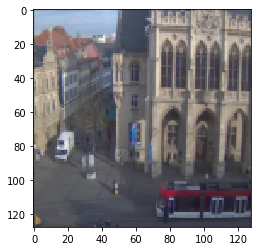

In [0]:
plt.imshow(X[0])

In [0]:
images[600]

'/root/.keras/datasets/home/mihail/mypages/rpmihail/skyfinder/images/4795/20130210_203423.jpg'

In [0]:
%mv /root/.keras/datasets/home/mihail/mypages/rpmihail/skyfinder/images/4795/20121122_113424.jpg .

In [0]:
np.save('train_images.npy' , X)

In [0]:
def load_image(image_path , mask_path):
  img = tf.keras.preprocessing.image.load_img(image_path , target_size=(128 , 128))
  img = tf.keras.preprocessing.image.img_to_array(img , dtype='float32')
  img = img / 255.0

  img1 = tf.keras.preprocessing.image.load_img(mask_path , grayscale=True , target_size=(128 , 128))
  img1 = tf.keras.preprocessing.image.img_to_array(img1 , dtype='float32')
  img1 = img1 / 255.0
  return img , img1

In [64]:
i , j = load_image(images[10000] , mask_map[10000])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [65]:
j.shape

(128, 128, 1)

In [0]:
j = np.ma.masked_where(j == 0, j)

In [0]:
image_dataset = tf.data.Dataset.from_tensor_slices(images)
image_dataset = image_dataset.map(
  load_image , num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(16)

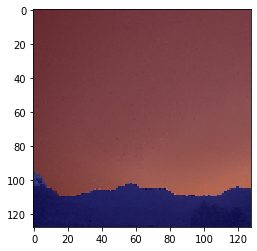

In [0]:
plt.imshow(i , cmap = 'gray' , interpolation='none')
plt.imshow(tf.squeeze(j) , cmap = 'jet', interpolation = 'none', alpha = 0.5)

In [0]:
len(data_files)
len(add_data_files)

9

In [0]:
masks = []

In [0]:
for file in os.listdir('/content/'):
  if file.endswith('.png'):
    masks.append(os.path.join('/content/' , file))

In [0]:
images[0].split('/')[-2]+'.png'

'4795.png'

In [0]:
mask_map = []

In [0]:
for image in images:
  mask_map.append(os.path.join('/content/' , image.split('/')[-2] + '.png'))

In [68]:
len(mask_map)

85562

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((images , mask_map))

dataset = dataset.map(lambda image , mask: tf.numpy_function(
    load_image , [image , mask] , [tf.float32 , tf.float32]
), num_parallel_calls = tf.data.experimental.AUTOTUNE)

dataset = dataset.shuffle(1000).batch(64)
dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(64, 1, 128, 128, 3)


TypeError: ignored

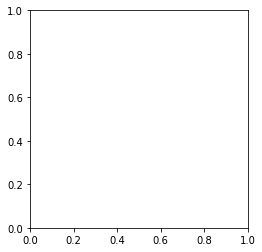

In [0]:
# for batch , (ig , ms) in enumerate(dataset):
#   print(batch)
#   ms[0] = np.ma.masked_where(ms[0] == 0, ms[0])
#   plt.imshow(ig[0])
#   plt.imshow(ms[0] , cmap='jet' , alpha=0.7)
#   break

for ig , ms in dataset:
  print(ig.shape)
  l = np.ma.masked_where(ms[0] == 0, ms[0])
  plt.imshow(ig[0])
  plt.imshow(tf.squeeze(l) , cmap='jet' , alpha=0.7)
  break

In [0]:
img_tensor = tf.keras.layers.Input((128 , 128 , 3) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [72]:
img_tensor.shape

TensorShape([None, 128, 128, 3])

In [74]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 128, 128, 16) 64          conv2d_19[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 128, 128, 16) 0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [0]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_sky_region.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [86]:
model.fit(dataset , epochs=5 , callbacks=callbacks)

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


669/669 [==============================] - 291s 434ms/step - loss: 0.1161 - accuracy: 0.9623
Epoch 2/5
669/669 [==============================] - 261s 389ms/step - loss: 0.1188 - accuracy: 0.9571
Epoch 3/5
669/669 [==============================] - 261s 390ms/step - loss: 0.1248 - accuracy: 0.9547
Epoch 4/5
669/669 [==============================] - 260s 388ms/step - loss: 0.1222 - accuracy: 0.9557
Epoch 5/5
669/669 [==============================] - 259s 388ms/step - loss: 0.1148 - accuracy: 0.9581


In [0]:
%cp /root/.keras/datasets/19834/20140728_213246.jpg /content/

cp: cannot stat '/root/.keras/datasets/19834/20140728_213246.jpg': No such file or directory


In [0]:
for image , mask in zip(images , mask_map):
  try:
    im = Image.load(image)
    im.verify() #I perform also verify, don't know if he sees other types o defects
    im.close() #reload is necessary in my case
    im = Image.load(filename) 
    im.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    im.close()
  except: 
    # print(image)
    images.remove(image)
    mask_map.remove(mask)

In [83]:
len(images)

42781

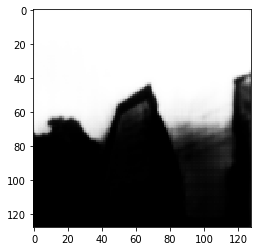

In [101]:
pred = model.predict(tf.expand_dims(test , axis=0))
pred = np.ma.masked_where(pred == 0 , pred)
plt.imshow(i)
plt.imshow(tf.squeeze(pred) , alpha=1 , cmap='gray')

In [0]:
test = tf.keras.preprocessing.image.load_img('/content/images.jpg' , target_size=(128 , 128))
test = tf.keras.preprocessing.image.img_to_array(test , dtype='float32')
test = test / 255.0

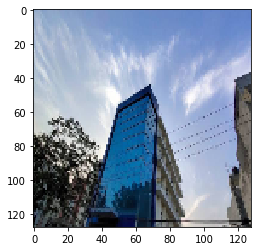

In [100]:
plt.imshow(test)